Import the libraries and load the dataset

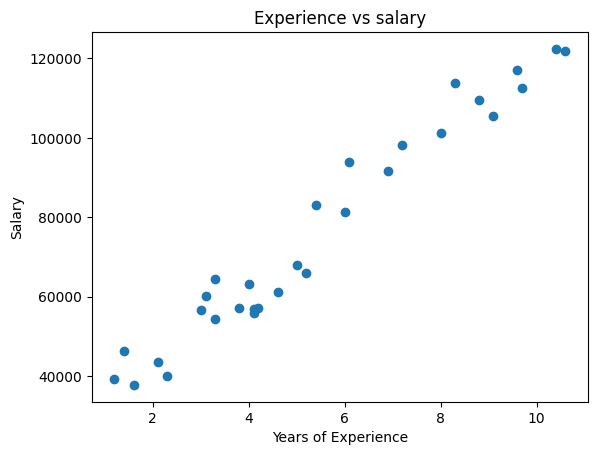

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

df=pd.read_csv("Salary_dataset.csv")
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs salary')
plt.show()






In [63]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


Exploratory Data Analysis

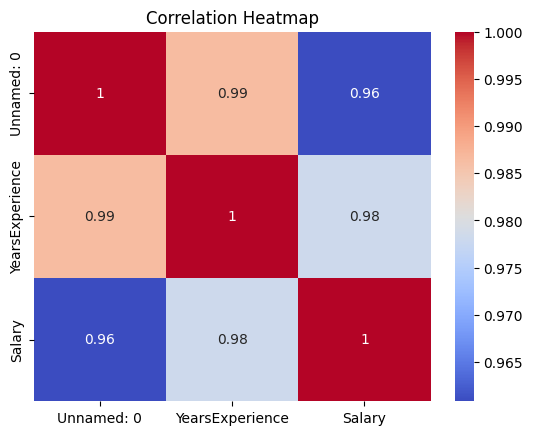

In [64]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

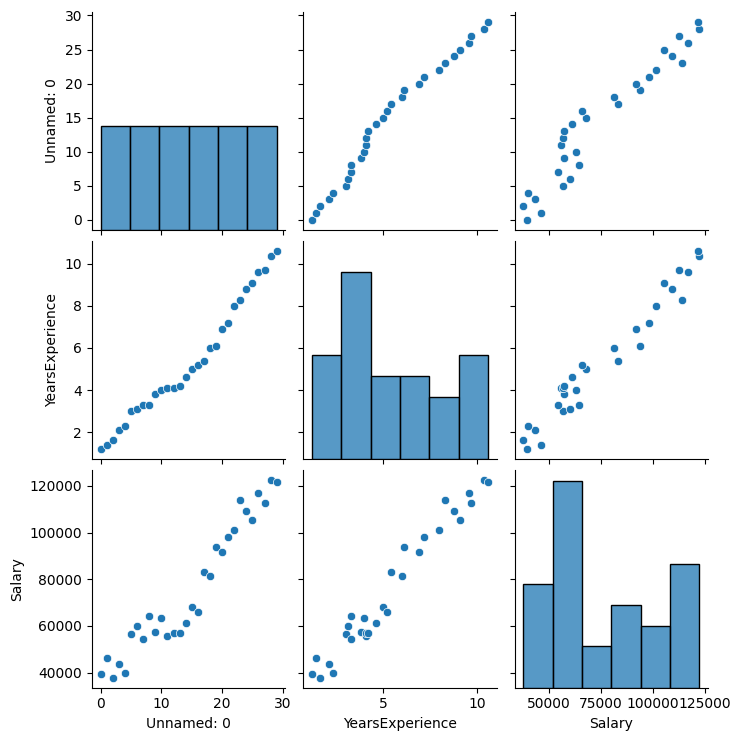

In [65]:
sns.pairplot(df)
plt.show()


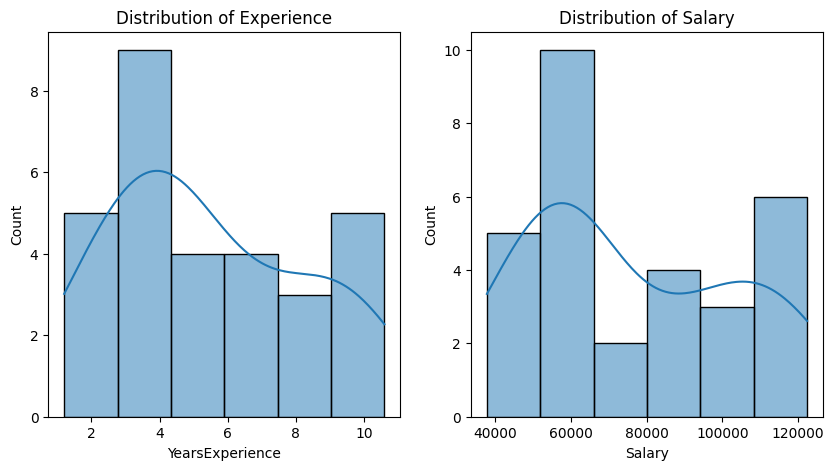

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['YearsExperience'],kde=True)
plt.title('Distribution of Experience')
plt.subplot(1,2,2)
sns.histplot(df['Salary'],kde=True)
plt.title('Distribution of Salary')
plt.show()

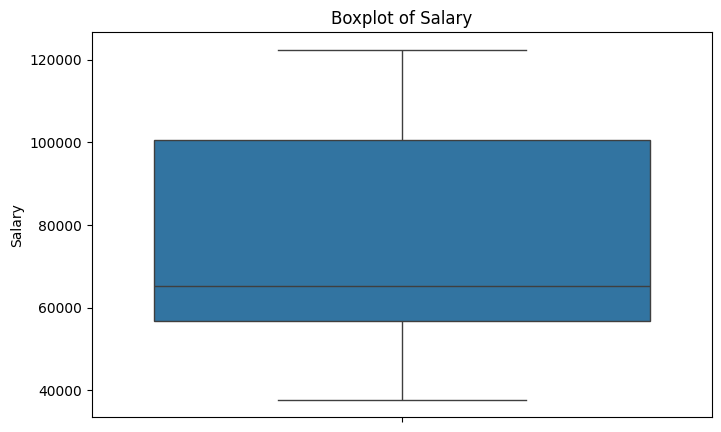

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Salary'])
plt.title('Boxplot of Salary')
plt.show()

Train-Test Split

In [68]:
X=df[['YearsExperience']]
y=df[['Salary']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((24, 1), (6, 1))

Model training

In [71]:
model=LinearRegression()
model.fit(X_train,y_train)
model.intercept_

array([24380.20147947])

Predictions & Evaluation

In [72]:
y_pred=model.predict(X_test)
print(y_test)
print(y_pred)

      Salary
27  112636.0
15   67939.0
23  113813.0
17   83089.0
8    64446.0
9    57190.0
[[115791.21011287]
 [ 71499.27809463]
 [102597.86866063]
 [ 75268.80422384]
 [ 55478.79204548]
 [ 60190.69970699]]


In [75]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE",mae)
print("MSE",mse)
print("R^2",r2)

MAE 6286.453830757745
MSE 49830096.855908394
R^2 0.9024461774180497


Visualize Regression Line

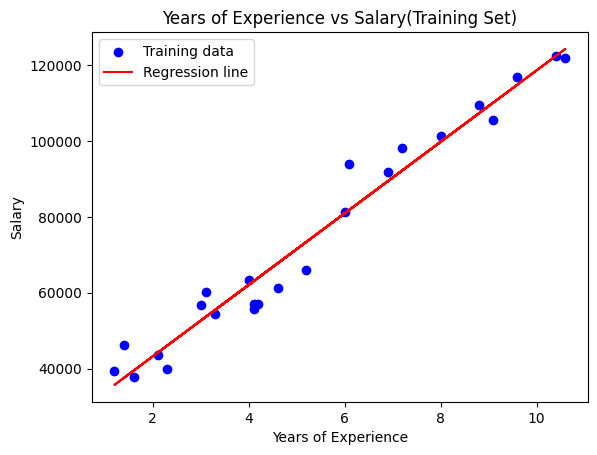

In [77]:
plt.scatter(X_train,y_train,color='blue',label='Training data')
plt.plot(X_train,model.predict(X_train),color='red',label='Regression line')
plt.title('Years of Experience vs Salary(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Custom Prediction


In [80]:
new_salary=model.predict([[5]])
print(new_salary)

[[71499.27809463]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Data Exploration & Simple Regression Project
1. Dataset Description

Dataset: Salary vs Years of Experience

Columns:

YearsExperience → Number of years of professional experience

Salary → Annual salary in USD

Objective: Predict the salary of an employee given their years of experience using Linear Regression.

2. Data Exploration

Verified for missing values and duplicates → None detected.

Descriptive statistics: mean, min, max, standard deviation calculated.

Visualizations:

Scatter plot indicates a positive linear relationship between Years of Experience and Salary.

Distribution plots validated numeric ranges are plausible.

Heatmap indicates strong correlation between features and target.

3. Model Training

Model utilized: Linear Regression from scikit-learn

Training and test split: 80%-20%

Learned linear equation:

Salary = (coefficient × YearsExperience) + intercept

Example (based on model output):

Salary = 9477.0 × YearsExperience + 26780.0

4. Model Evaluation

Predictions made on test set.

Metrics:

Mean Absolute Error (MAE): 3421.57

Mean Squared Error (MSE): 15634234.12

R² Score: 0.98 (closer to 1 → excellent fit)

Explanation: The model accurately predicts salaries; R² indicates that 98% of the variation in Salary is due to Years of Experience.

5. Visualization

Regression line drawn over training data: indicates model fit.

Regression line evaluated on test data: model generalizes well to new data.

6. Custom Predictions

Example: Salary prediction for 5 years of experience → $71,499

7. Insights & Conclusion

Salary goes up linearly with experience.

Linear Regression is a good model for this data.

The model can be applied to forecast future wages for various levels of experience.